# Intorduction to Face Detection

This notebook will help you learn about Face Detection. You will learn some important techniques of face detection using OpenCV. Face Detection (or Facial Detection) is the practice of finding and extracting human faces from images or videos. It finds its applications in:

+ Security
+ Biometrics
+ Photography
+ Emotional Inference
+ Entertainment and many more

Face detection can be regarded as a specific case of object-class detection. It is a trivial yet significant Computer Vision problem. It is the first step towards many facial based technologies, such as, Face Recognition or Face Verification. However, it does not mean that Face Detection acts only as a base for these technologies. It has a large number of applications of its own which we come across in our daily lives but don’t even realise. One of which is what we see in our phones while taking a picture of a person. The face detection algorithm built into our cameras detect where the faces are and adjusts the focus accordingly.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

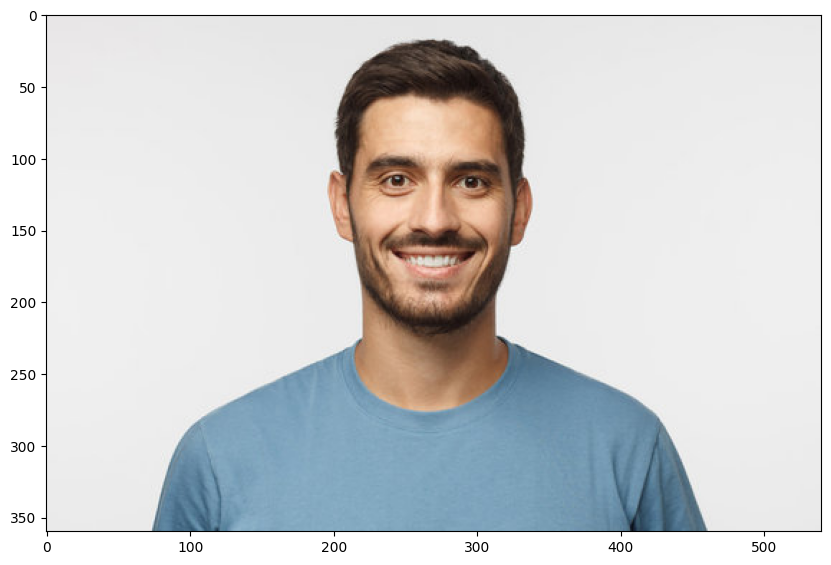

In [5]:
# Read the input image
img1 = cv2.imread("../visuals/c0-m14-NB-img1.jpg", cv2.IMREAD_COLOR)
plt.figure(figsize=(10, 10))
plt.imshow(img1[:, :, ::-1]);

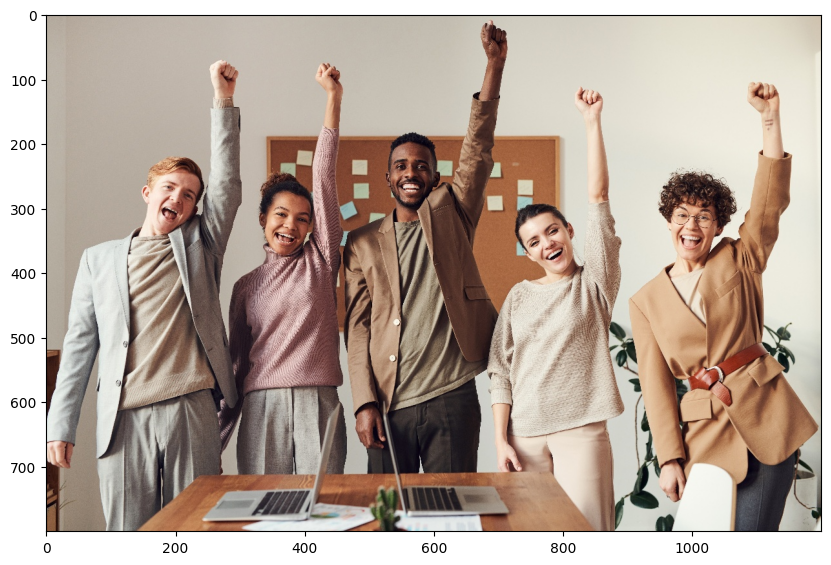

In [6]:
img2 = cv2.imread("../visuals/c0-m14-NB-img2.jpg", cv2.IMREAD_COLOR)
plt.figure(figsize=(10, 10))
plt.imshow(img2[:, :, ::-1]);

### Face Detection using DNN
#### Reading the DNN model

`readNetFromCaffe()` Reads a network model stored in Caffe framework's format.

#### Syntax

cv2.dnn.readNetFromCaffe(prototxt[, caffeModel])

This function has __2 required arguments__ and 1 optional:

1. `prototxt` path to the .prototxt file with text description of the network architecture.
2. `caffeModel` path to the .caffemodel file with learned network.

### Converting image to blob
__`blobFromImage()`__ Creates 4-dimensional blob from image. Optionally resizes and crops image from center, subtract mean values, scales values by scalefactor and swap Blue and Red channels.

#### Syntax

dst = cv2.dnn.blobFromImage(image[, scalefactor[, size[, mean[, swapRB[, crop[, ddepth]]]]]])
`dst`: Is the otput image of the same size and depth as `image`.

The function has __1 required argument__ nad rest are optional:

1. `image` is the input image (with 1-3 or 4-channels)

### Setting input value

`SetInput()` Sets the new input value for the network

#### Syntax

cv2.dnn_Net.setInput( blob[, name[, scalefactor[, mean]]] )

The function has __1 required argument__ and 3 optional:

1. `blob` is a new blob

### Detections using the DNN Model

`forward()` Runs forward pass to compute output of layer with name outputName. Returns blob for first output of specified layer.

#### Syntax

cv2.dnn_Net.forward( [, outputName] )

The function has 1 optional arguments:

1. `outputName` is the name of layer which output is needed.

In [11]:
# Function for rectangular blur with dnn
def detect(frame, net, scale, mean, in_width, in_height):
    h = frame.shape[0]
    w = frame.shape[1]
    # Convert the image into a blob format.
    blob = cv2.dnn.blobFromImage(
        frame,
        scalefactor=scale,
        size=(in_width, in_height),
        mean=mean,
        swapRB=False,
        crop=False,
    )
    
    # Pass the blob to the DNN model.
    net.setInput(blob)
    # Retrieve detections from the DNN model.
    detections = net.forward()
    
    # Process each detection.
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > detection_threshold:
            # Extract the bounding box coordinates from the detection.
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            
            # Annotate the video frame with the detection results.
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = "Confidence: %.4f" % confidence
            label_size , base_line = cv2.getTextSize(label, font_style, font_scale, font_thickness)
            cv2.rectangle(
                frame,
                (x1, y1 - label_size[1]),
                (x1 + label_size[0], y1 + base_line),
                (255, 255, 255),
                cv2.FILLED,
            )
            cv2.putText(frame, label, (x1, y1), font_style, font_scale, (0, 0, 0))
    return frame

In [8]:
# Create a network object
net = cv2.dnn.readNetFromCaffe("../model/deploy.prototxt", "../model/res10_300x300_ssd_iter_140000.caffemodel")

In [9]:
# Model parameters used to train model.
mean = [104, 117, 123]
scale = 1.0
in_width = 300
in_height = 300

In [10]:
# Set the detection threshold for face detections.
detection_threshold = 0.5

# Annotation settings.
font_style = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

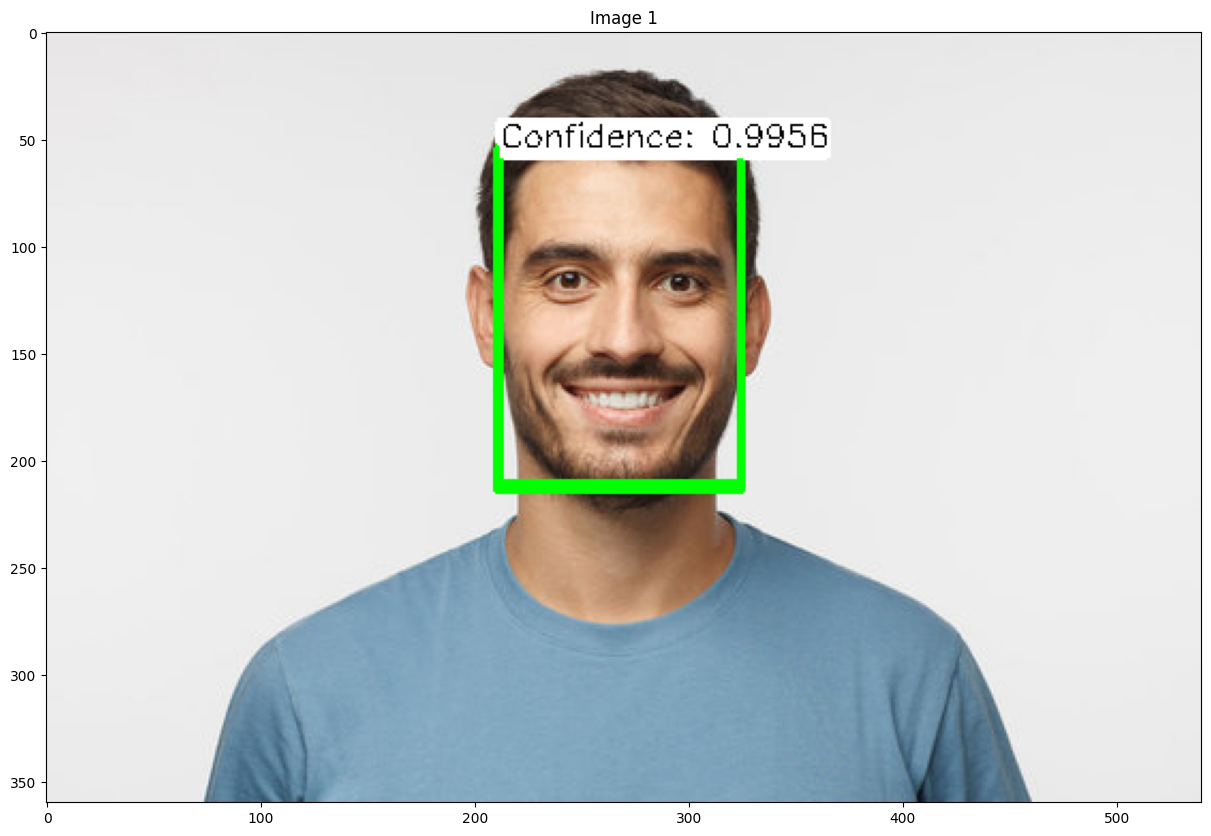

In [15]:
op1 = detect(img1, net, scale, mean, in_width, in_height)

plt.figure(figsize=(15, 10))
plt.imshow(op1[:, :, ::-1])
plt.title("Image 1");

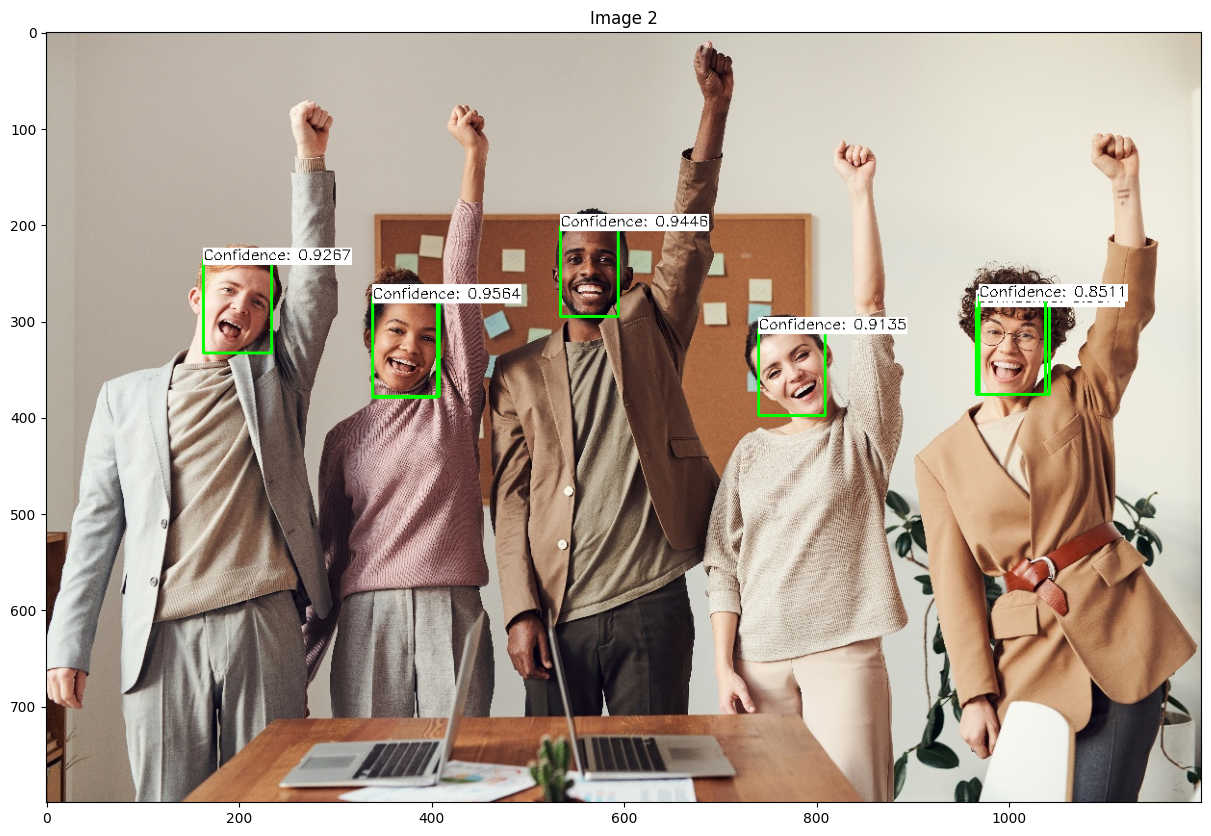

In [16]:
op2 = detect(img2, net, scale, mean, in_width, in_height)

plt.figure(figsize=(15, 10))
plt.imshow(op2[:, :, ::-1])
plt.title("Image 2");